# Hands On ML Chapter 6 - Decision Trees

In [75]:
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

## Training and Visualizing a Decision Tree

In [76]:
iris = load_iris()
X = iris.data[:,2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In first node it check petal_length and separate datasets to 2 groups. Then the left node is a leaf and it doesn't ask any questions. The right node asks another question and separate rest of data into another two groups. Finally you have three classes. 

Left node probabilities:
* 50/50 = 100% setosa
* 0/50 = 0% versicolor
* 0/50 = 0% virginica

Middle node:
* 0/54 = 0% setosa
* 49/54 = 90.7% versicolor
* 5/53 = 9.3% virginica

Right node:
* 0/46 = 0% setosa
* 1/46 = 2.17% versicolor
* 45/46 = 97.83% virginica

Max depth = 2, so it has two levels.

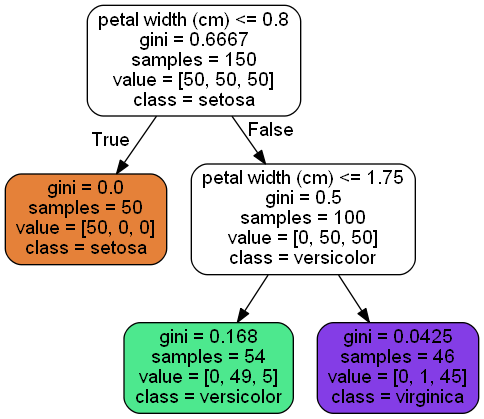

In [77]:
dot_data = StringIO()  
export_graphviz(
    tree_clf,
    out_file = dot_data,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


### Estimating Class Probabilities

In [78]:
tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]])

(array([[ 0.        ,  0.90740741,  0.09259259]]), array([1]))

## Regression

In [79]:
X = 10 * np.random.rand(1000,1)
y = 10 + X + np.random.randn(1000,1)

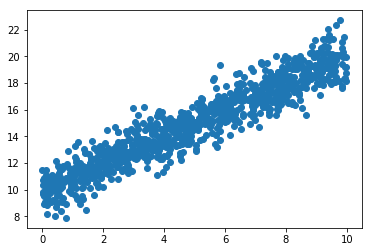

In [80]:
plt.scatter(X, y)

In [81]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

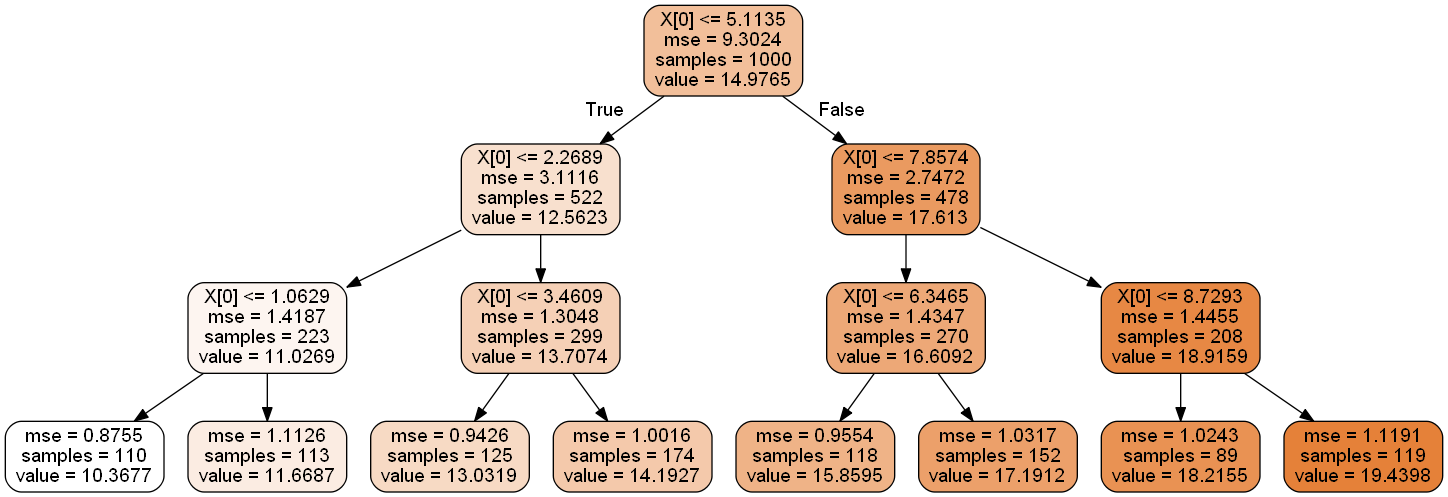

In [82]:
dot_data = StringIO()  
export_graphviz(
    tree_reg,
    out_file = dot_data,
    rounded = True,
    filled = True
)
  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Exercises

In [83]:
moons = make_moons(n_samples=10000, noise=0.4)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(moons[0], moons[1], test_size=0.2)

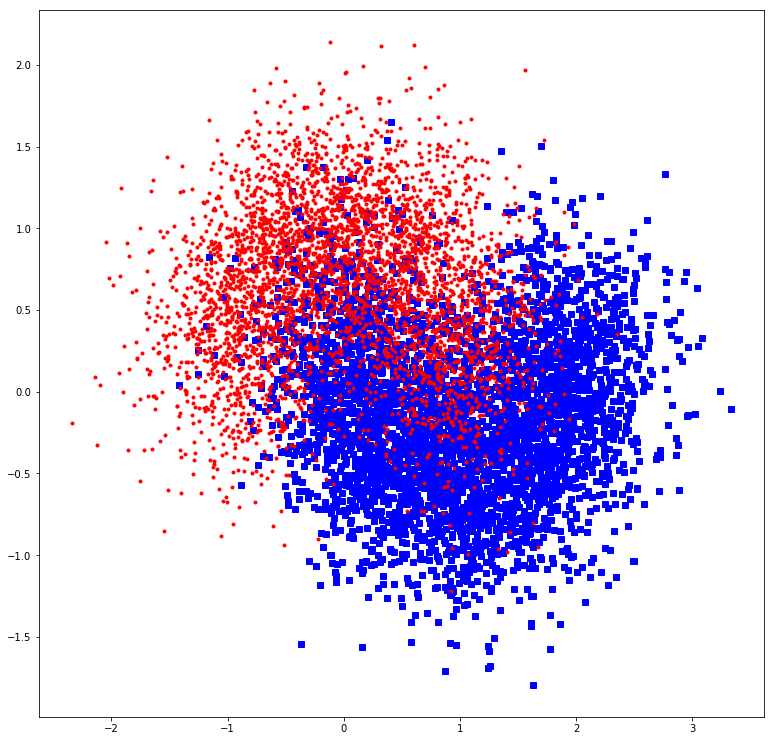

In [85]:
plt.figure(figsize=(13,13))
plt.plot(X_train[:,0][y_train==1], X_train[:,1][y_train==1], "bs")
plt.plot(X_train[:,0][y_train==0], X_train[:,1][y_train==0], "r.")

In [86]:
param_grid = [
    {'criterion': ["gini", "entropy"], 'max_leaf_nodes': [20, 30, 40], 'min_samples_leaf': [5, 10, 15, 20], 'min_samples_split': [3, 5, 10], 'max_depth': [2,3,4,5,6,7,8,9,10]}
]
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [20, 30, 40], 'min_samples_leaf': [5, 10, 15, 20], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [87]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=30, min_impurity_split=1e-07,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
final_model = grid_search.best_estimator_

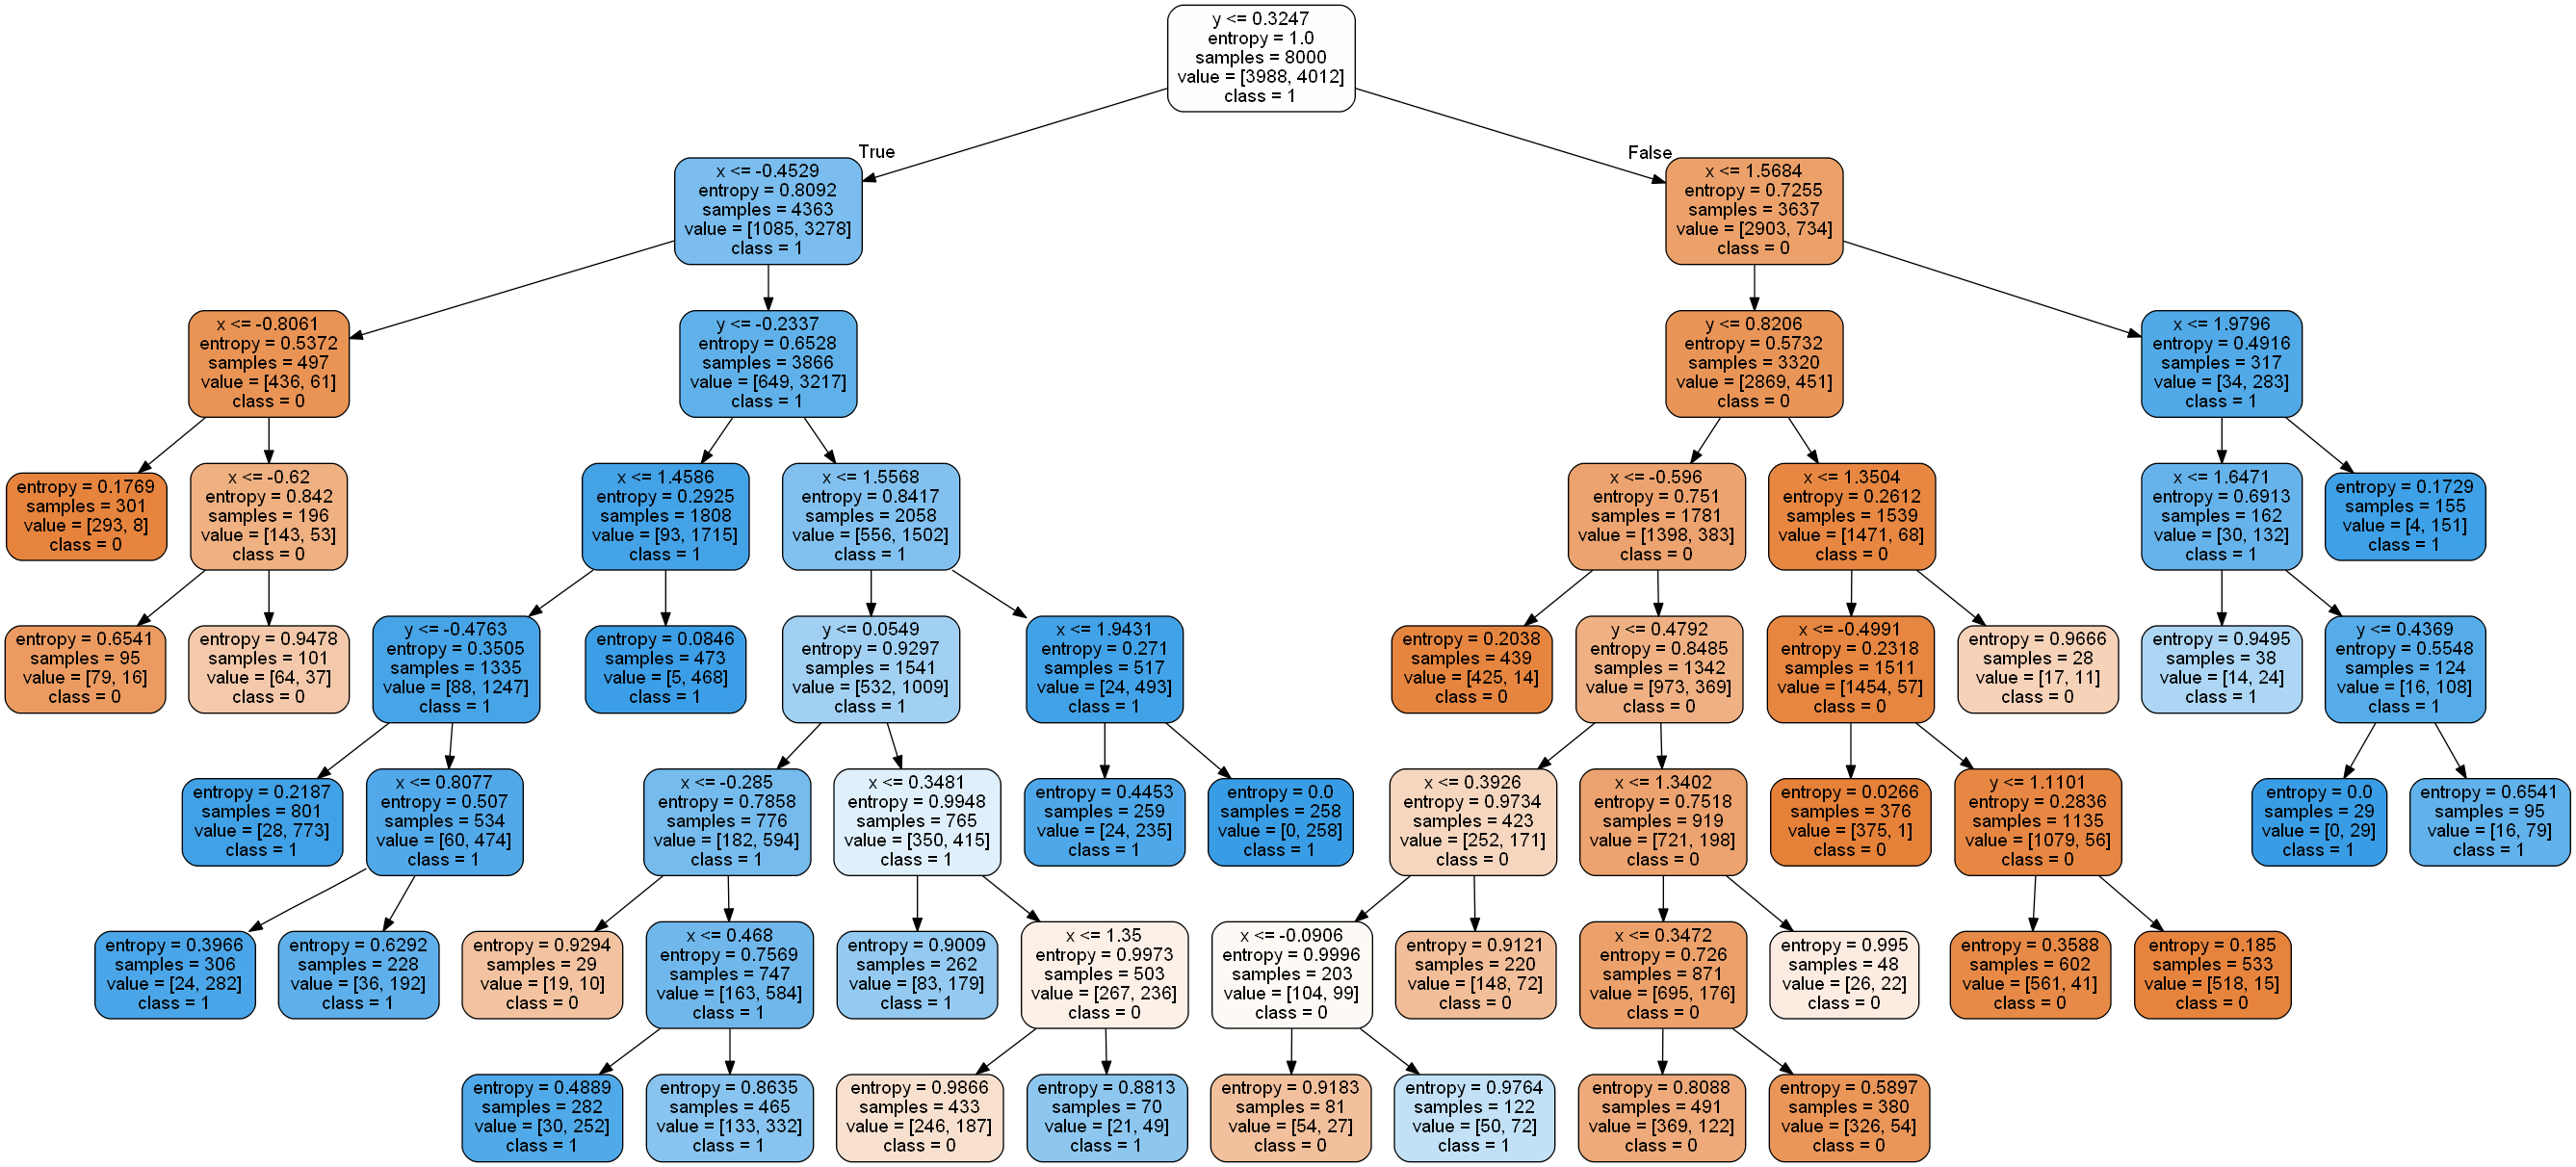

In [89]:
dot_data = StringIO()  
export_graphviz(
    final_model,
    out_file = dot_data,
    feature_names = ["x", "y"],
    class_names = ["0", "1"],
    rounded = True,
    filled = True
)
  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())


In [90]:
final_predictions = final_model.predict(X_test)

In [91]:
accuracy_score(y_test, final_predictions)

0.85999999999999999